In [1]:
import numpy as np
import pandas as pd
from nn_utils import *


## Data Processing

### Applying One-Hot Encoding to Training Set

In [2]:
col_names = ["Class", "a1", "a2", "a3", "a4", "a5", "a6", "ID"]

In [3]:
tr_data = pd.read_csv("../monk+s+problems/monks-1.train", sep =" ",  names = col_names)
tr_data.head()
tr_data = tr_data.sample(frac=1)
tr_data.reset_index(drop=True, inplace=True)
tr_data_Y = tr_data[["Class"]]
tr_id_dummies = pd.get_dummies(tr_data["ID"], dtype=int, drop_first = True)

tr_data_X = pd.concat([tr_data.drop(["Class", "ID"], axis = 1), tr_id_dummies], axis = 1)
tr_data_X.insert(tr_data_X.shape[0], "unknown", 0)
print(tr_data_X)

     a1  a2  a3  a4  a5  a6  data_107  data_111  data_114  data_116  ...  \
0     2   1   1   3   4   1         0         0         0         0  ...   
1     3   2   2   1   1   1         0         0         0         0  ...   
2     3   2   1   2   4   2         0         0         0         0  ...   
3     1   1   2   3   1   2         0         0         0         0  ...   
4     3   2   1   1   4   2         0         0         0         0  ...   
..   ..  ..  ..  ..  ..  ..       ...       ...       ...       ...  ...   
119   1   3   2   2   4   2         0         0         0         0  ...   
120   1   3   2   3   4   1         0         0         0         0  ...   
121   2   3   2   1   3   2         0         0         0         0  ...   
122   1   2   2   2   4   1         0         0         0         0  ...   
123   3   3   1   1   2   1         0         0         0         0  ...   

     data_72  data_76  data_86  data_87  unknown  data_88  data_92  data_93  \
0       

### Applying One-Hot Encoding to Test Set

In [4]:
test_data = pd.read_csv("../monk+s+problems/monks-1.test", sep =" ",  names = col_names)
test_data.head()
test_data.reset_index(drop = True, inplace = True)
test_data = test_data.sample(frac=1)
test_data_Y = test_data[["Class"]]
test_id_dummies = pd.get_dummies(test_data["ID"], dtype=int, drop_first = True)

test_data_X = pd.concat([test_data.drop(["Class", "ID"], axis = 1), test_id_dummies], axis = 1)
test_data_X.insert(len(test_data_X.columns), "unknown", 0)

common_cols = list(set(tr_data_X.columns).intersection(test_data_X.columns))

print(test_data_X)

     a1  a2  a3  a4  a5  a6  data_10  data_100  data_101  data_102  ...  \
1     1   1   1   1   1   2        0         0         0         0  ...   
274   2   3   2   2   2   1        0         0         0         0  ...   
418   3   3   2   2   2   1        0         0         0         0  ...   
321   3   1   2   2   1   2        0         0         0         0  ...   
377   3   2   2   3   1   2        0         0         0         0  ...   
..   ..  ..  ..  ..  ..  ..      ...       ...       ...       ...  ...   
362   3   2   2   1   2   1        0         0         0         0  ...   
316   3   1   2   1   3   1        0         0         0         0  ...   
135   1   3   2   2   4   2        0         0         0         0  ...   
120   1   3   2   1   1   1        0         0         0         0  ...   
49    1   2   1   1   1   2        0         0         0         0  ...   

     data_91  data_92  data_93  data_94  data_95  data_96  data_97  data_98  \
1          0        

### Processing Test Set for One-Hot Encoding

In [5]:
for col in test_data_X.columns: 
    if col not in common_cols: #IF IT'S AN UNSEEN CLASS WE SET "UNKNOWN" TO 1 AND REMOVE THE COLUMN
        row = test_data_X.loc[test_data_X[col] == 1].index[0] 
        test_data_X.at[row,"unknown"] = 1
        test_data_X.drop(col, axis = 1, inplace = True)
print (test_data_X)

     a1  a2  a3  a4  a5  a6  data_107  data_111  data_114  data_116  ...  \
1     1   1   1   1   1   2         0         0         0         0  ...   
274   2   3   2   2   2   1         0         0         0         0  ...   
418   3   3   2   2   2   1         0         0         0         0  ...   
321   3   1   2   2   1   2         0         0         0         0  ...   
377   3   2   2   3   1   2         0         0         0         0  ...   
..   ..  ..  ..  ..  ..  ..       ...       ...       ...       ...  ...   
362   3   2   2   1   2   1         0         0         0         0  ...   
316   3   1   2   1   3   1         0         0         0         0  ...   
135   1   3   2   2   4   2         0         0         0         0  ...   
120   1   3   2   1   1   1         0         0         0         0  ...   
49    1   2   1   1   1   2         0         0         0         0  ...   

     data_72  data_76  data_86  data_87  data_88  data_92  data_93  data_94  \
1       

### Testing that the numbers are correct

In [6]:
n_unknowns = test_data_X.unknown.value_counts()[1] 
print(n_unknowns)

n_knowns = tr_data_X.shape[0]
print(n_knowns)

print(n_knowns + n_unknowns == test_data_X.shape[0]) # NUMBER OF KNOWN EXAMPLES (TR.SET) + NUMBER OF UNKNOWN EXAMPLES IN TEST SET GIVES US TEST SET TOT. EXAMPLES


308
124
True


## Creating the Neural Network

In [7]:
net = NeuralNetwork()

net.add_input_layer(tr_data_X.shape[1])

net.add_hidden_layer(tr_data_X.shape[1], 4)

net.add_output_layer(4, 1)

## Training

### Training with Mean Square Error

total Error pre-training = 0.15342171745322306
Epoch = 1, total Error post-training = 0.20095749310963565
Epoch = 2, total Error post-training = 0.1439965474989567
Epoch = 3, total Error post-training = 0.13463901632843198
Epoch = 4, total Error post-training = 0.12426002890455921
Epoch = 5, total Error post-training = 0.11509627827061068
Epoch = 6, total Error post-training = 0.10902047978804329
Epoch = 7, total Error post-training = 0.10288228268056711
Epoch = 8, total Error post-training = 0.09857132526692575
Epoch = 9, total Error post-training = 0.09614911676131441
Epoch = 10, total Error post-training = 0.09579101857371258
Epoch = 11, total Error post-training = 0.09786071893541559
Epoch = 12, total Error post-training = 0.1081402108938091
Epoch = 13, total Error post-training = 0.12885021062676458
Epoch = 14, total Error post-training = 0.10088786180749135
Epoch = 15, total Error post-training = 0.10278670306952503
Epoch = 16, total Error post-training = 0.09738023299913807
Epoc

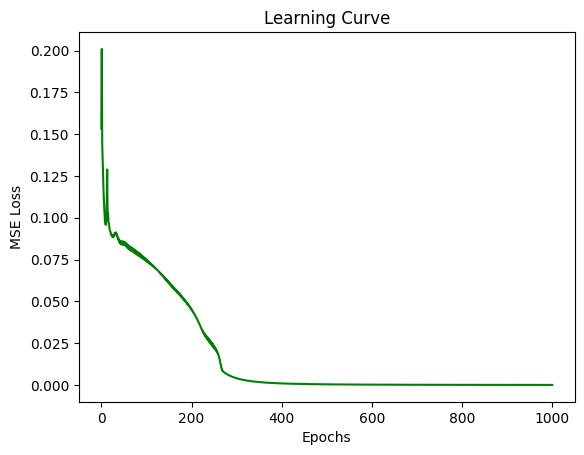

In [8]:
losses = net.train(tr_data_X, tr_data_Y, epochs=1000,
                   eta=0.5, clip_value=None, hid_act_fun="tanh", out_act_fun="sigmoid", cost_fun="mse")  # TANH IS FASTER?? SCRITTO SULLE SLIDE
# print(net)
# print(net.input_layer.weights)

plot_loss(losses, cost_fun="mse")

### Training with Binary Cross Entropy

In [9]:
'''
#RESET THE NETWORK!!!

losses = net.train(tr_data_X, tr_data_Y, epochs=1000,
                   eta=0.5, clip_value=None, hid_act_fun="tanh", out_act_fun="sigmoid", cost_fun="b_ce")  # TANH IS FASTER?? SCRITTO SULLE SLIDE
# print(net)
# print(net.input_layer.weights)

plot_loss(losses, cost_fun="b_ce")
'''

'\n#RESET THE NETWORK!!!\n\nlosses = net.train(tr_data_X, tr_data_Y, epochs=1000,\n                   eta=0.5, clip_value=None, hid_act_fun="tanh", out_act_fun="sigmoid", cost_fun="b_ce")  # TANH IS FASTER?? SCRITTO SULLE SLIDE\n# print(net)\n# print(net.input_layer.weights)\n\nplot_loss(losses, cost_fun="b_ce")\n'

In [10]:
def test(self, data: pd.DataFrame, labels: pd.DataFrame, hid_act_fun, out_act_fun, cost_fun):
    return self.calcError(data, labels, hid_act_fun, out_act_fun, cost_fun)

valid_X = tr_data_X.head(30)
valid_Y = tr_data_Y.head(30)
test_err = net.calcError(valid_X, valid_Y, "tanh", "sigmoid", "mse")
print(test_err)

5.865018615484268e-05
